## Загрузка данных

In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.metrics import r2_score

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [4]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [5]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Исходный датасет состоит из 5000 строк и 5 столбцов с персональной информацией о клиентах. Пропусков и аномалий нет.

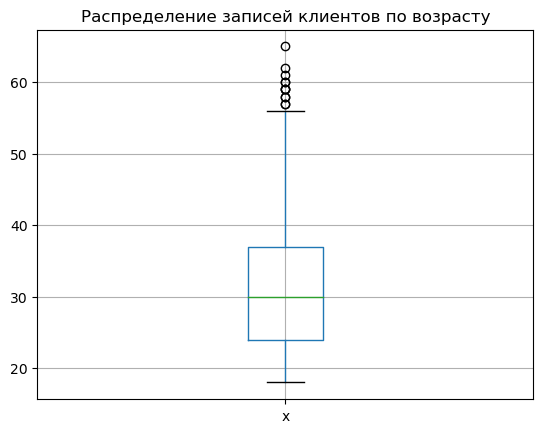

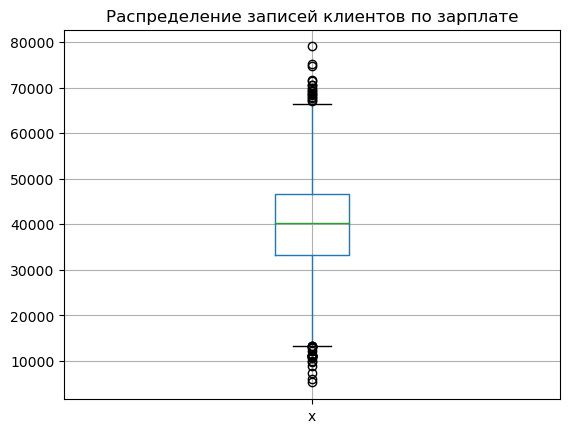

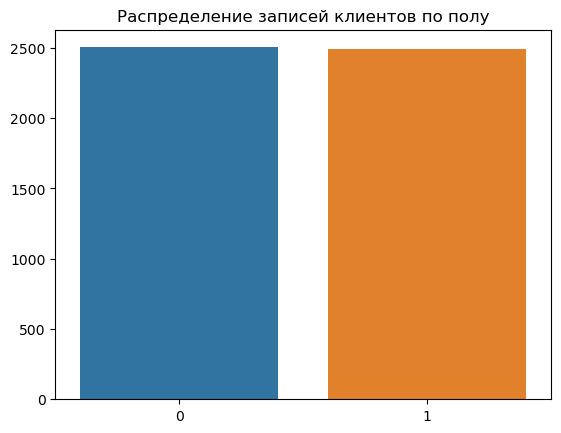

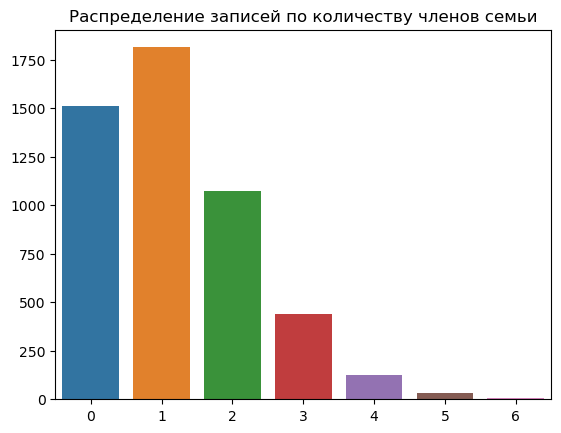

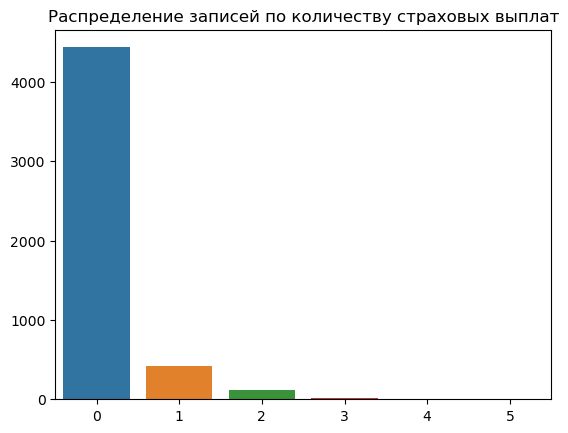

In [6]:
pd.plotting.boxplot(data['Возраст']).set_title('Распределение записей клиентов по возрасту')
plt.show()

pd.plotting.boxplot(data['Зарплата']).set_title('Распределение записей клиентов по зарплате')
plt.show()

sns.barplot(x=data['Пол'].value_counts().index, \
            y=data['Пол'].value_counts().values).set_title('Распределение записей клиентов по полу')
plt.show()

sns.barplot(x=data['Члены семьи'].value_counts().index, \
            y=data['Члены семьи'].value_counts().values).set_title('Распределение записей по количеству членов семьи')
plt.show()

sns.barplot(x=data['Страховые выплаты'].value_counts().index, \
            y=data['Страховые выплаты'].value_counts().values).set_title('Распределение записей по количеству страховых выплат')
plt.show()

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Если
$$
w' = P^{-1} w
$$
То
$$
a = a'
$$
Так как
$$
a = Xw
$$
$$
a' = X P w'
$$
$$
a' = X P P^{-1} w
$$
$$
a' = X w
$$

Доказательство
$$
w' = ((X P)^T X P)^{-1} (X P)^T y
$$

$$
w' = (P^T X^T X P)^{-1} P^T X^T y
$$

$$
w' = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

$$
w' = P^{-1} (X^T X)^{-1} E X^T y
$$

$$
w' = P^{-1}(X^T X)^{-1} X^T y
$$

$$
w' = P^{-1} w
$$

**Ответ:** не изменится.

**Обоснование:** обучение производится по преобразованным признакам, но предсказания производятся также по преобразованным признакам. Из-за этого в процессе предсказания обратимая матрица умножается на обратную, образуя единичную, тем самым предикт остаётся такой же, как в случае без преобразования признаков.

## Алгоритм преобразования

**Алгоритм**

Перед обучением исходные признаки умножим на случайную матрицу, которая является обратимой.

**Обоснование**

Доказанное выше тождество подтверждает, что при умножении матрицы признаков на обратимую матрицу, качество линейной регрессии не изменяется.

## Проверка алгоритма

In [7]:
# Подготавливаем матрицу с признаками
X = data.drop('Страховые выплаты', axis=1).values
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# Создаём квадратную матрицу
P = np.random.normal(size=(X.shape[1], X.shape[1]))

# Проверяем обратимость матрицы
while np.linalg.det(P) == 0:
    P = np.random.normal(size=(X.shape[1], X.shape[1]))

# Умножаем матрицу с признаками на обратимую матрицу
X_converted = X @ P

In [8]:
# Подготавливаем целевой признак
y = data['Страховые выплаты']

In [9]:
# Создаём класс линейной регрессии, в котором есть метод заполнения модели обучающими признаками и целевым признаком, 
# а также метод предсказания.
class LinearRegression:
    def fit(self, X, y):
        w = np.linalg.inv(X.T @ X) @ X.T @ y
        self.w = w
    def predict(self, test_features):
        return test_features.dot(self.w)

In [10]:
model_converted = LinearRegression()
model_converted.fit(X_converted, y)
pred_converted = model_converted.predict(X_converted)

In [11]:
model = LinearRegression()
model.fit(X, y)
pred = model.predict(X)

In [12]:
print('Значение метрики r2_score модели, обученной на преобразованных признаках:', round(r2_score(y, pred_converted), 4))

Значение метрики r2_score модели, обученной на преобразованных признаках: 0.4249


In [13]:
print('Значение метрики r2_score модели, обученной на исходных признаках:', round(r2_score(y, pred), 4))

Значение метрики r2_score модели, обученной на исходных признаках: 0.4249


**Вывод:** преобразование признаков на качество модели линейной регрессии не влияет.